In [1]:
#Common imports
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
df = pd.read_csv("diabetes.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.head(100)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
95,6,144,72,27,228,33.9,0.255,40,0
96,2,92,62,28,0,31.6,0.130,24,0
97,1,71,48,18,76,20.4,0.323,22,0
98,6,93,50,30,64,28.7,0.356,23,0


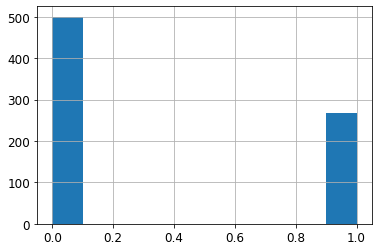

In [7]:
df.Outcome.hist()

In [31]:
X = df.drop("Outcome", axis = 1)
Y = df["Outcome"].to_numpy()

In [12]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()

X_scaled = mmscaler.fit_transform(X)


In [23]:
X_scaled

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [32]:
type(Y)

numpy.ndarray

In [105]:
class Perceptron:
    
    def __init__ (self, niter, LR):
        
        self.niter = niter 
        self.LR = LR 
        
        
    def fit (self, x, y ):
        self.m = []
        accuracy = {}
        max_accuracy = 0
        
        self.weight = np.ones(1 + x.shape[1])
        
        for i in range(self.niter):
            m_count = 0
            for x_row , y_row in zip(x,y):
                updated_W = self.LR * (y_row - self.predict(x_row))
                self.weight[1:] = updated_W * x_row
                self.weight[0] = updated_W
                m_count += int(updated_W != 0.0)
            self.m.append(m_count)
            
            accuracy[i] = accuracy_score(self.predict_array(x), y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                chkptw = self.weight[1:]
                chkptb = self.weight[0]
                
        self.weight[1:] = chkptw
        self.weight[0] = chkptb
                
            
        return self
                
                
                
                
    def predict(self, x):
        
        #percep = np.dot(self.weight[1:], x) + self.weight[0]
        
        return np.where(np.dot(self.weight[1:], x) >= self.weight[0], 1, 0)
    
    def predict_array(self, x): 
        
        y = []
        
        for x1 in x:
            
            results = self.predict(x1)
            y.append(results)
            
        return np.array(y)
        
    

In [ ]:
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import Perceptron
pred = Perceptron(5000, 0.00001)
# use cross_validation
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=100)
pred.fit(x_train, y_train)



In [ ]:
predicted = pred.predict_array(x_train)

In [ ]:
plt.plot(range(1, len(pred.m) + 1), pred.m, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [ ]:

print('Accuracy score: ', accuracy_score(y_train, predicted))
print('Metrics Report')
print(classification_report(y_train, predicted))